In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("GroceryDataset.csv")

In [3]:
df.head()

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
0,Bakery & Desserts,$56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,Bakery & Desserts,$159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,Bakery & Desserts,$44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,Bakery & Desserts,$39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,Bakery & Desserts,$59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...


In [4]:
df.tail()

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
1752,Snacks,$23.99,No Discount,NaN,"Oberto Thin Style Smoked Sausage Stick, Cockta...",$,Cocktail Pepperoni Smoked Sausage Sticks 3...,Cocktail PepperoniSmoked Sausage Sticks3 oz ba...
1753,Snacks,$49.99,No Discount,NaN,"Cheetos Crunchy, Original, 2.1 oz, 64-count",$,Made with Real Cheese,64-count2.1 oz Bags
1754,Snacks,$22.99,No Discount,NaN,"Sabritas Chile & Limon Mix, Variety Pack, 30-c...",$,Chile & Limón Mix Variety Pack 30 ct Net...,8-Doritos Dinamita Chile Limón Flavored Rolled...
1755,Snacks,$17.49,No Discount,NaN,"Fruit Roll-Ups, Variety Pack, 72-count",$,Variety Pack 1 Box with 72 Rolls Flavore...,Fruit Flavored Snacks\nVariety Includes: Straw...
1756,Snacks,$21.99,No Discount,NaN,"Takis, Rolled Tortilla Chips, Intense Nacho, 1...",$,"Intense Nacho Cheese Non-Spicy 1 oz bag, 5...",Takis Non-Spicy Cheese Tortilla Chips\nIndivid...


In [5]:
df.isnull().sum()/df.shape[0]*100

Sub Category            0.000000
Price                   0.170746
Discount                0.000000
Rating                 61.183836
Title                   0.000000
Currency                0.284576
Feature                 1.024474
Product Description     2.390438
dtype: float64

In [6]:
df.shape

(1757, 8)

In [7]:
df["Currency"].unique()

array(['$', nan], dtype=object)

### Visualizing Data

Text(0, 0.5, 'Sub Category')

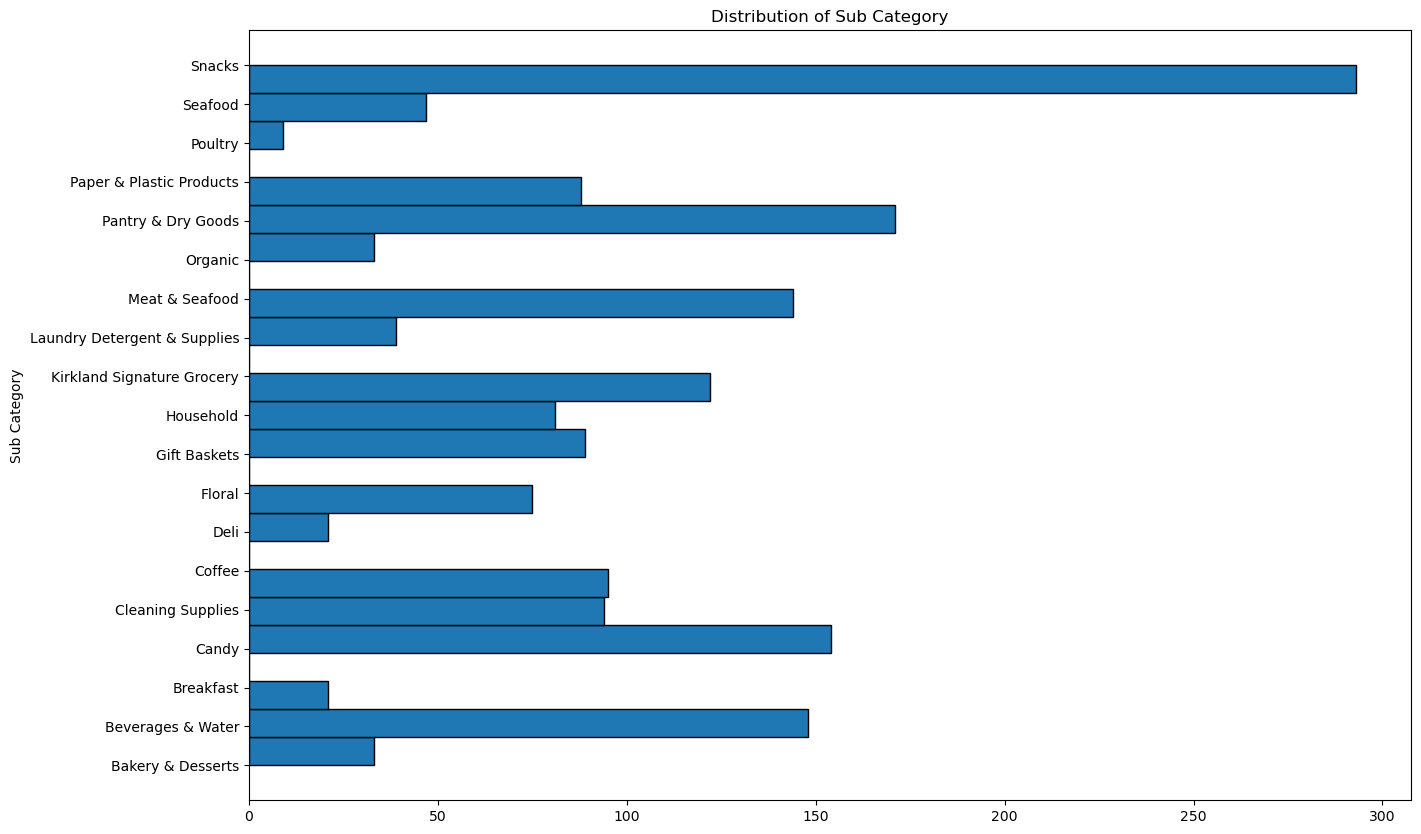

In [8]:
plt.figure(figsize=(15,10))
plt.hist(df["Sub Category"],bins=25,edgecolor="black",orientation='horizontal')
plt.title("Distribution of Sub Category")
plt.ylabel("Sub Category")

In [9]:
# Converting String to Numeric values

In [10]:
df["Price"].unique()

array(['$56.99 ', '$159.99 ', '$44.99 ', '$39.99 ', '$59.99 ', '$74.99 ',
       '$29.99 ', '$62.99 ', '$299.99 ', '$54.99 ', '$89.99 ', '$49.99 ',
       '$99.99 ', '$24.99 ', '$72.99 ', '$119.99 ', '$109.99 ', '$34.99 ',
       '$27.99 ', '$21.99 ', '$20.99 ', '$19.99 ', '$439.99 ', '$9.99 ',
       '$14.99 ', '$18.99 ', '$21.49 ', '$17.99 ', '$23.99 ', '$4.99 ',
       '$12.99 ', '$32.99 ', '$13.79 ', '$23.49 ', '$22.99 ', '$8.99 ',
       '$15.99 ', '$28.99 ', '$16.49 ', '$549.99 ', '$17.49 ', '$25.99 ',
       '$11.69 ', '$69.99 ', '$21.79 ', '$37.99 ', '$139.99 ', '$41.99 ',
       '$18.49 ', '$16.99 ', '$36.99 ', '$10.99 ', '$61.99 ', '$17.59 ',
       '$11.99 ', '$24.49 ', '$10.49 ', '$9.69 ', '$8.19 ', '$9.49 ',
       '$12.49 ', '$12.69 ', '$31.99 ', '$15.49 ', '$46.99 ', '$11.49 ',
       '$16.39 ', '$13.99 ', '$38.99 ', '$26.99 ', '$13.49 ', '$14.49 ',
       '$26.69 ', '$42.99 ', '$45.99 ', '$7.99 ', '$25.69 ', '$19.49 ',
       '$12.09 ', '$10.79 ', '$17.89 ', '$28.79 ', 

In [11]:
import re

In [12]:
def setprice(price):
    if type(price)==float:
        return price
    pat1 = re.compile(r'[0-9]+.[0-9]+')
    res = re.findall(pat1,price)
    result = []
    for i in res:
        if ',' in i:
            result.append(i.replace(",",""))
        else:
            result.append(i)
    if len(result) == 2:
        return (float(result[0])+float(result[1]))/2
    else:
        return float(result[0])

In [13]:
df['Price']=df['Price'].apply(setprice)

In [44]:
df["Price"].min()

11.99

In [45]:
df["Price"].max()

1999.0

In [14]:
df["Price"].unique()

array([  56.99,  159.99,   44.99,   39.99,   59.99,   74.99,   29.99,
         62.99,  299.99,   54.99,   89.99,   49.99,   99.99,   24.99,
         72.99,  119.99,  109.99,   34.99,   27.99,   21.99,   20.99,
         19.99,  439.99,    9.99,   14.99,   18.99,   21.49,   17.99,
         23.99,    4.99,   12.99,   32.99,   13.79,   23.49,   22.99,
          8.99,   15.99,   28.99,   16.49,  549.99,   17.49,   25.99,
         11.69,   69.99,   21.79,   37.99,  139.99,   41.99,   18.49,
         16.99,   36.99,   10.99,   61.99,   17.59,   11.99,   24.49,
         10.49,    9.69,    8.19,    9.49,   12.49,   12.69,   31.99,
         15.49,   46.99,   11.49,   16.39,   13.99,   38.99,   26.99,
         13.49,   14.49,   26.69,   42.99,   45.99,    7.99,   25.69,
         19.49,   12.09,   10.79,   17.89,   28.79,   84.99,   58.49,
         20.89,    9.79,   29.89,  199.99,   47.99,   18.39,   43.99,
         33.99,   28.49,   10.29,   35.99,   48.99,   29.69,    6.59,
        149.99,  649

D:\Software\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


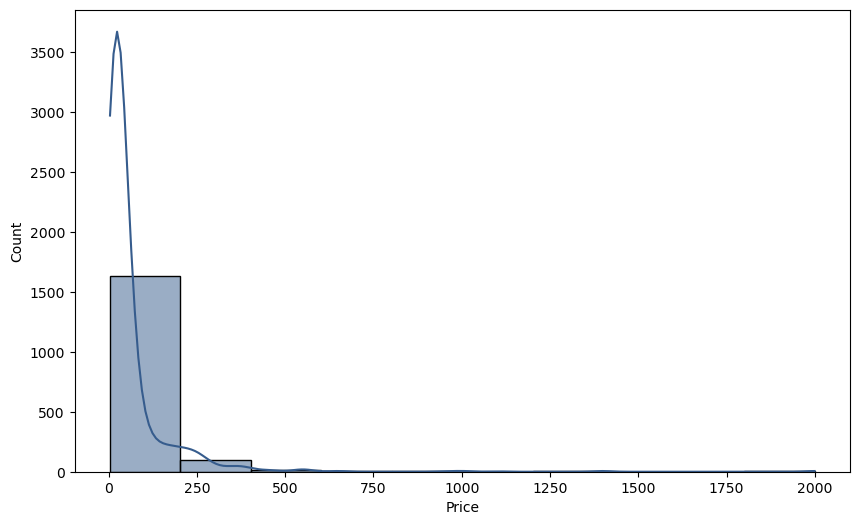

In [17]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Price", kde=True,bins = 10, color=sns.color_palette("viridis")[1])
plt.show()

In [18]:
category = df["Sub Category"].value_counts()
catg = {}
for i,j in category.items():
    catg[i]=j

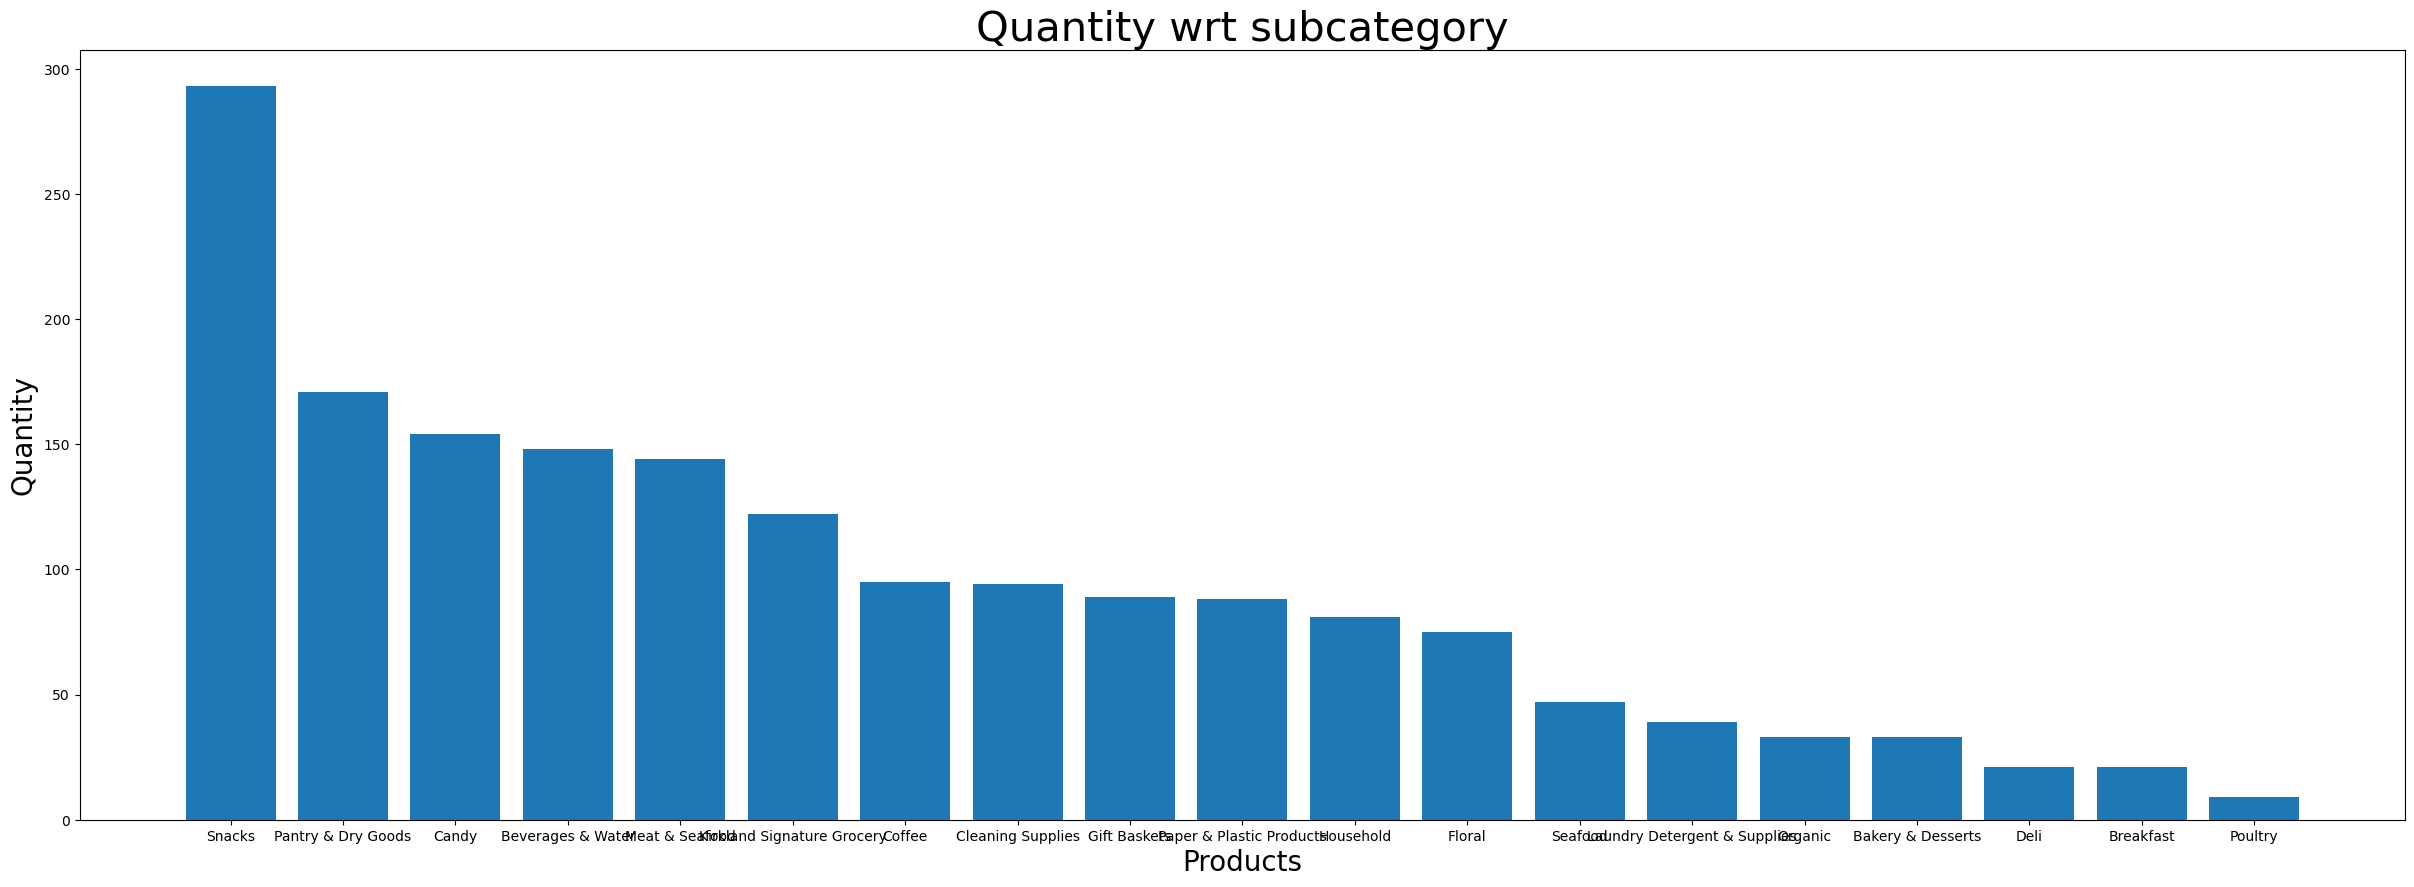

In [26]:
plt.figure(figsize=(30,10))
plt.bar(catg.keys(),catg.values())
plt.title("Quantity wrt subcategory",fontsize=30)
plt.xlabel("Products",fontsize=20)
plt.ylabel("Quantity",fontsize=20)
plt.show()

In [27]:
df["Price"].fillna(0,inplace=True)

In [28]:
category_price = {}
for sc,pr in zip(df["Sub Category"],df["Price"]):
    if sc not in category_price:
        category_price[sc] = pr
    else:
        category_price[sc]+=pr

In [29]:
category_price = dict(sorted(category_price.items(),key = lambda item:item[1],reverse=True))

In [49]:
print(max(zip(category_price.values(),category_price.keys()))[0])

33107.560000000085


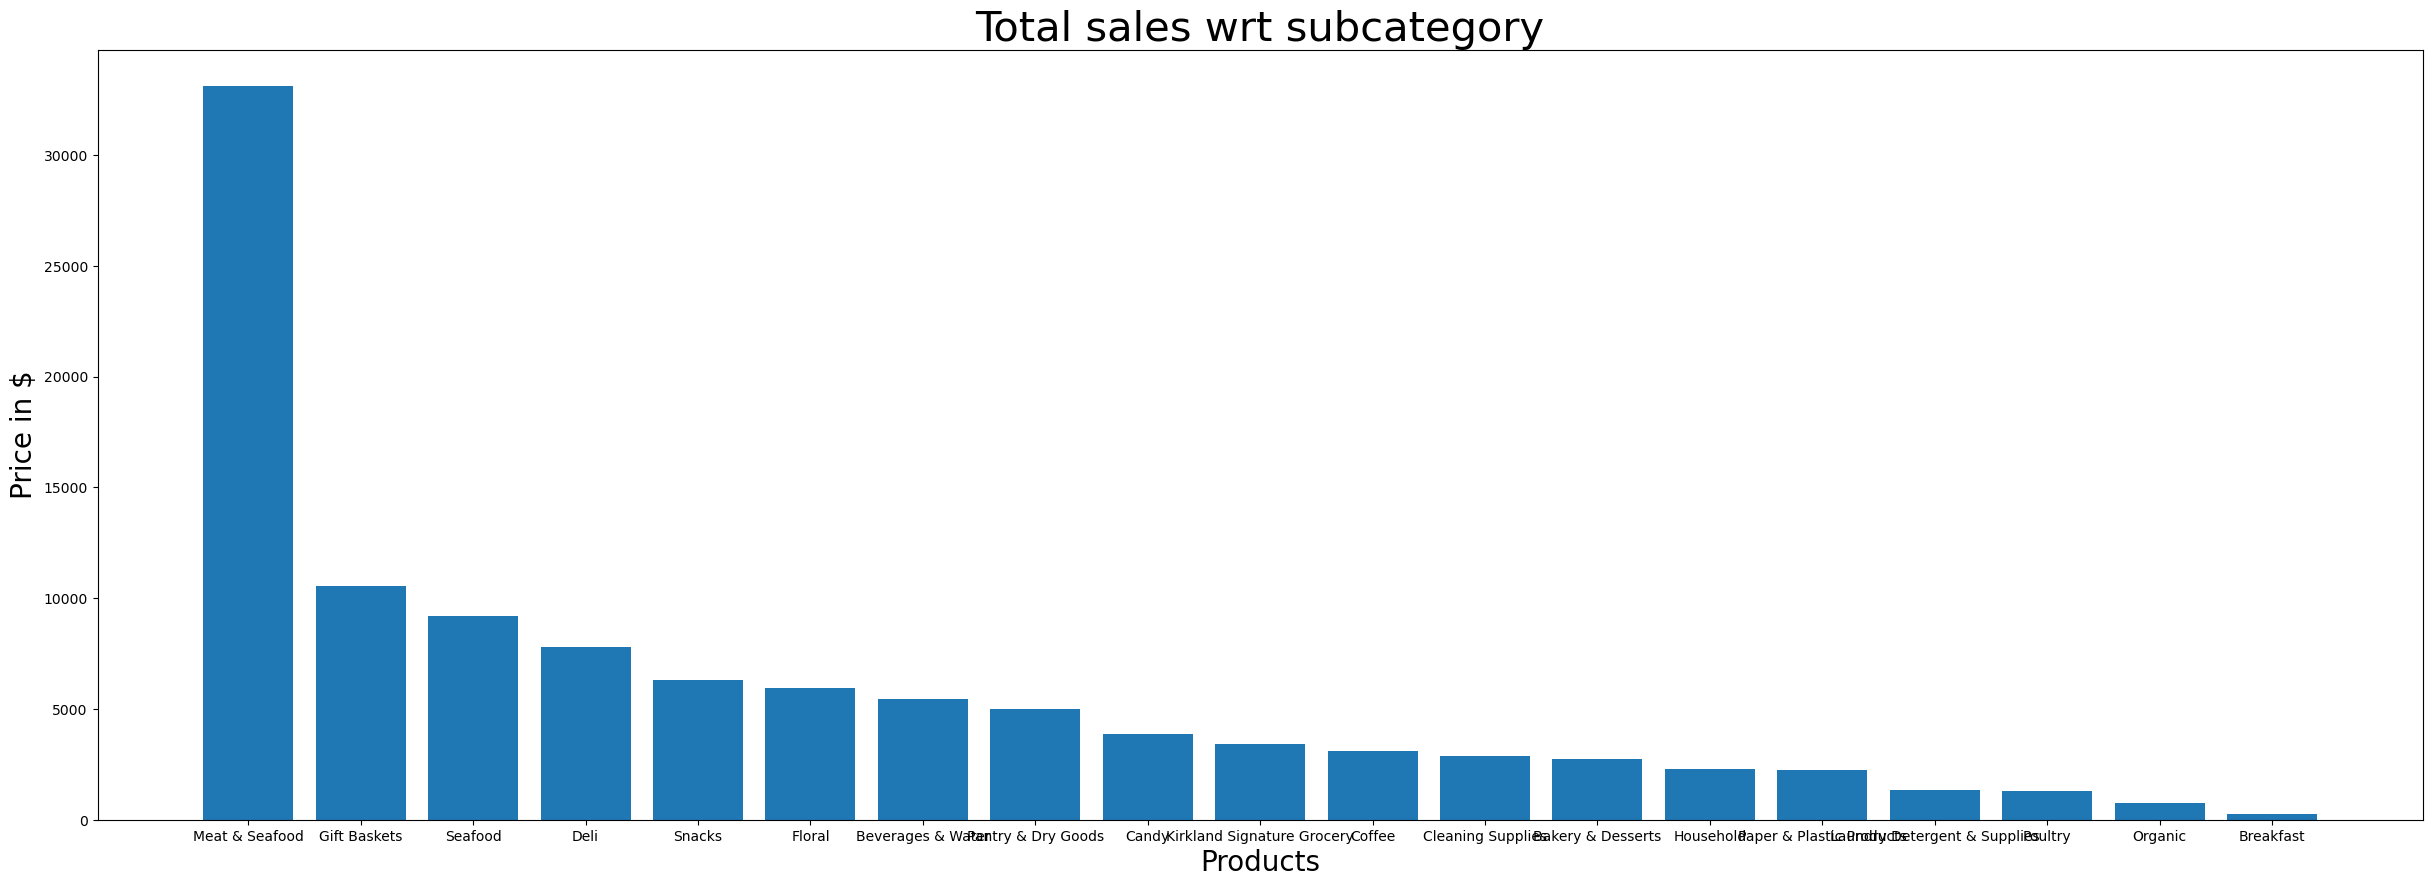

In [33]:
plt.figure(figsize=(30,10))
plt.bar(category_price.keys(),category_price.values())
plt.title("Total sales wrt subcategory",fontsize=30)
plt.xlabel("Products",fontsize=20)
plt.ylabel("Price in $",fontsize=20)
plt.show()

In [34]:
temp_df = df

In [35]:
temp_df.dropna(inplace=True)

In [36]:
temp_df.isna().sum()

Sub Category           0
Price                  0
Discount               0
Rating                 0
Title                  0
Currency               0
Feature                0
Product Description    0
dtype: int64

In [37]:
temp_df.shape

(673, 8)

#### Extracting ratings from the Review

In [38]:

def transform_rating(rating):
    res=re.findall(r"Rated (\d+\.?\d?)?",rating)
    if len(res)==0:
        return 3
    else:
        return float(res[0])
    
    

In [39]:
temp_df["Rating"]=temp_df["Rating"].apply(transform_rating)

In [40]:
sub_category_counts = temp_df["Sub Category"].value_counts()
new_scc = {}
for i,j in sub_category_counts.items():
    new_scc[i] = [j]


In [41]:
cat_rat_com = {}
for subc,rat in zip(temp_df["Sub Category"],temp_df["Rating"]):
    if subc not in cat_rat_com:
        cat_rat_com[subc] = rat
    else:
        cat_rat_com[subc]+=rat
for k,v in cat_rat_com.items():
    tot = sub_category_counts[k]
    cat_rat_com[k] = cat_rat_com[k]/tot

Text(0.5, 1.0, 'Rating of the subproduct')

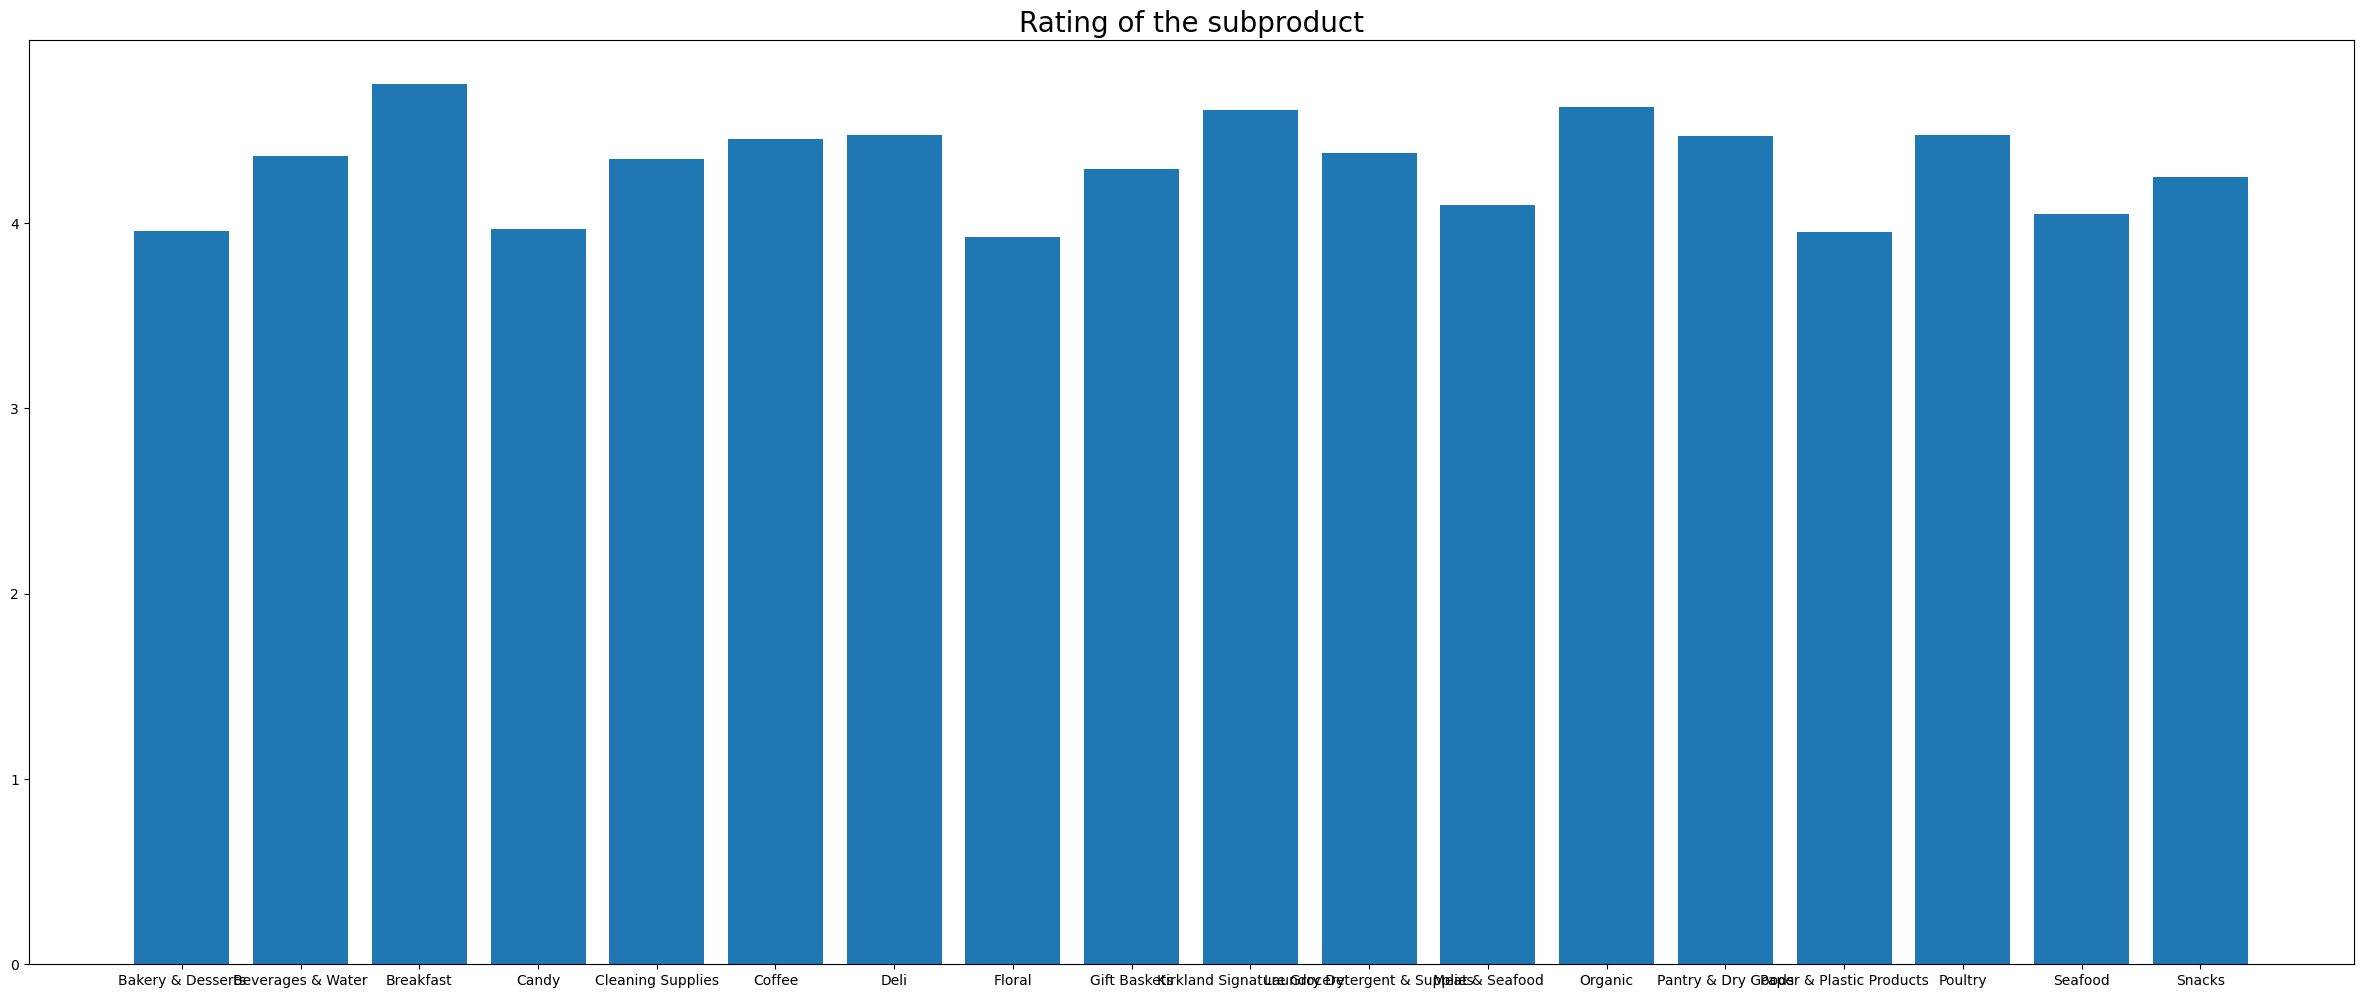

In [42]:
plt.figure(figsize=(30,12))
plt.bar(cat_rat_com.keys(),cat_rat_com.values())
plt.title("Rating of the subproduct",fontsize="20")

# Conclusion